## [Tutorial] Support Vector Machines (SVM) 

* 본 Tutorial은 고려대학교 산업경영공학부 강필성 교수님의 대학원 수업인 Business Analytics 강의 중 SVM 관련 내용을 담고 있습니다. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import random
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

### 🖍️ 간단한 예시 
- 우선 가장 간단하게 X (단변량), y로 이루어진 데이터셋을 이용하여 SVM이 어떤 식으로 적용이 되는지 살펴보도록 하겠습니다.

#### Step 1 : 데이터셋 생성
- scikit-learn의 _make blobs_ 함수를 이용하여 가상 데이터를 생성한다
- make_blobs 함수
    - n_samples : 표본 데이터의 수
    - n_features : 독립 변수의 수
    - centers : 생성할 클러스터의 수
    - cluster_std : 클러스터의 표준 편차 

In [2]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 42, cluster_std = 1.5)

In [3]:
# Add a bias to the X1 vector
X_bias = np.ones([X.shape[0], 3])
X_bias[:, 1:3] = X
print(X_bias.shape)

(100, 3)


- y는 다음과 같이 0과 1의 값으로 이루어진 것을 확인할 수 있습니다

In [4]:
print(y.shape)
y

(100,)


array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

- 데이터셋의 분포를 보면 크게 두가지로 클러스터로 구분되어 있는 모습을 확인할 수 있습니다.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, shuffle=True)

In [6]:
print('X_train : \n', X_train[:5], '\n')
print('X_test : \n', X_test[:5], '\n')
print('y_train : \n', y_train[:5], '\n')
print('y_test : \n', y_test[:5])

X_train : 
 [[ 2.78445277e+00 -7.51523569e-03]
 [-2.06501721e+00  9.40586904e+00]
 [-2.68267005e+00  8.56263058e+00]
 [ 5.42279118e+00  2.41864669e+00]
 [-3.52458062e+00  9.93180056e+00]] 

X_test : 
 [[-3.87123374  6.89583058]
 [ 5.17655988  2.81434647]
 [-3.20015578 10.59996947]
 [-0.29235656  8.2368808 ]
 [ 4.27179666  0.84256544]] 

y_train : 
 [1 0 0 1 0] 

y_test : 
 [0 1 0 0 1]


Text(0, 0.5, 'y')

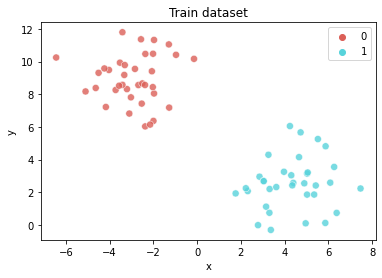

In [7]:
plt.title("Train dataset")
sns.scatterplot(x = X_train[:, 0], y = X_train[:, 1], hue = y_train, s = 50, alpha = 0.8, palette = "hls")
plt.xlabel("x")
plt.ylabel("y")

In [8]:
clf = SVC(kernel = 'linear', C = 1000, random_state = 42)
clf.fit(X_train, y_train)


SVC(C=1000, kernel='linear', random_state=42)

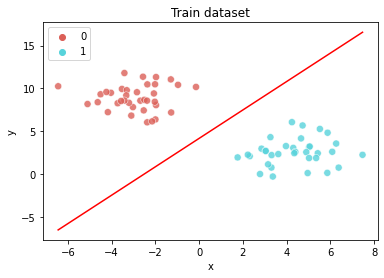

In [9]:
plt.title("Train dataset")
sns.scatterplot(x = X_train[:, 0], y = X_train[:, 1], hue = y_train, s = 50, alpha = 0.8, palette = "hls")
plt.xlabel("x")
plt.ylabel("y")

w = clf.coef_[0]           
b = clf.intercept_[0]
      
x_points = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]))    
y_points = -(w[0] / w[1]) * x_points - b / w[1]  
plt.plot(x_points, y_points, c='r')

In [10]:
# test set에 대해 예측 진행
y_pred=clf.predict(X_test)

In [11]:
# metric 산출
print('Model accuracy score with Linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Linear kernel and C=1000.0 : 1.0000


### 🖍️ 다양한 데이터셋을 이용한 실험
- 간단한 예시를 통해 어떻게 SVM이 적용될 수 있는지 살펴보았습니다. 하지만 X와 y변수가 단순히 숫자형으로 이루어져서 그런지 결과물이 잘 와닿지 않습니다. 그렇다면 이번에는 좀더 직관적인 데이터셋을 이용하여 SVM을 적용시켜 보도록 하겠습니다. 

#### 📂 **[데이터셋] : Star Dataset for Stellar Classification** 
- Star의 몇몇 feature들을 포함하고 있는 데이터셋 : [download](https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs)
- _TargetClass_ : Star가 Dwarf(0)인지 Giant(1)인지에 대한 라벨
- _B-V_ : color index
- _Amag_ : Star의 절대적 크기

#### Step 1: 데이터셋 불러오기

In [12]:
data = '../data/Star3642_balanced.csv'
star = pd.read_csv(data)
star.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [13]:
colnames = star.columns
colnames

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

/home/sunwookim/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

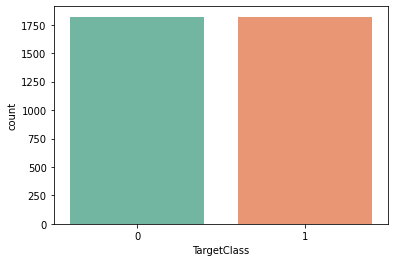

In [14]:
sns.countplot(star['TargetClass'], palette = 'Set2')

- 다음과 같이 target label의 경우에는 balance된 형태로 target 분포가 이루어진 것을 확인할 수 있었습니다

In [15]:
# 데이터셋에 대한 요약을 확인합니다
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [16]:
# 결측치 확인
star.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [17]:
X = star.drop(['TargetClass', 'SpType'], axis=1)
y = star['TargetClass']
X.head()

,Vmag,Plx,e_Plx,B-V,Amag
0,5.99,13.73,0.58,1.318,16.678352
1,8.70,2.31,1.29,-0.045,15.518060
2,5.77,5.50,1.03,0.855,14.471813
3,6.72,5.26,0.74,-0.015,15.324928
4,8.76,13.44,1.16,0.584,19.401997


In [18]:
y

0       0
1       0
2       0
3       1
4       1
       ..
3637    0
3638    1
3639    0
3640    1
3641    0
Name: TargetClass, Length: 3642, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((2549, 5), (1093, 5))

In [20]:
colnames = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[colnames])
X_test = pd.DataFrame(X_test, columns=[colnames])

In [21]:
X_train

,Vmag,Plx,e_Plx,B-V,Amag
0,-0.965267,-0.480889,-0.474527,-1.780168,-1.374673
1,-0.168740,-0.408879,-0.203691,0.910813,-0.578879
2,-2.201782,0.163857,-0.460985,1.288414,-0.541180
3,-1.678349,1.238993,-0.284942,-0.961273,0.524968
4,-1.875585,-0.271556,-0.623487,-2.144122,-1.082617
...,...,...,...,...,...
2544,0.764336,-0.413065,0.365066,0.508189,-0.081545
2545,-0.009434,-0.437348,-0.515153,1.154207,-0.615770
2546,-0.343217,-0.382921,-0.393276,1.684214,-0.574599
2547,-0.502523,-0.167727,-0.163065,0.251147,-0.094616


In [22]:
X_train.describe()

,Vmag,Plx,e_Plx,B-V,Amag
count,2.549000e+03,2.549000e+03,2.549000e+03,2.549000e+03,2.549000e+03
mean,1.449518e-16,-8.362606e-18,8.083852e-17,1.672521e-16,-2.648158e-17
std,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00
min,-4.644467e+00,-1.031017e+00,-9.349493e-01,-2.262407e+00,-5.591844e+00
25%,-5.707965e-01,-4.063667e-01,-4.203598e-01,-7.770216e-01,-5.389421e-01
50%,1.953873e-01,-2.255028e-01,-1.630651e-01,1.010162e-01,-2.509625e-02
75%,7.036479e-01,9.100915e-02,1.483970e-01,6.992647e-01,6.609989e-01
max,3.222193e+00,2.283716e+01,2.851853e+01,3.867935e+00,5.372094e+00


In [23]:
y_test

415     0
3252    0
3193    1
298     0
1874    0
       ..
168     1
3377    0
962     1
945     0
462     0
Name: TargetClass, Length: 1093, dtype: int64

#### Step 2 : model fit

In [24]:
clf = SVC(kernel = 'linear', C = 1000, random_state = 42)
clf.fit(X_train, y_train)

SVC(C=1000, kernel='linear', random_state=42)

#### Step 3 : test 데이터셋을 이용한 예측

In [25]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

#### Step 4 : metric을 이용한 평가

In [26]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8988
Test set score: 0.8911


#### 🔎 **Hyper-parameter search**

- 이번에는 hyper-parameter search를 통해 해당 값에 따라 어떤 식으로 결과에 영향을 미치는지 직접 확인해보도록 하겠습니다

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC() 

# hyperparameter tuning을 위한 parameter 지정
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} ]

In [28]:
grid_search = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 5,verbose=0)

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [30]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


In [31]:
estimator = grid_search.best_estimator_
y_pred = estimator.predict(X_test)
accuracy_score(y_test, y_pred)

0.8929551692589204

- rbf kernel이 가장 성능이 높게 나오고 있음을 확인할 수 있으며 이는 rbf kernel 자체의 특성과 연관시켜 생각해볼 수 있습니다.rbf커널은 특정 샘플을 랜드마크로 정하여 각 샘플이 랜드마크와 얼마나 유사한지를 보고 구하기 때문에 결정경계에 있어 효과적이라고 할 수 있습니다.

#### 🔎 **Scaling의 영향**
- 이번에는 scaling의 영향을 한번 살펴보고자 합니다
- SVM은 데이터의 scale에 민감하다는 내용을 일전에 본 적이 있는데 정말 그러한지 확인해보도록 하겠습니다

- Scaler는 다음과 같이 3가지를 이용합니다
    1. Standard Scaler : 기존 변수를 정규 분포로 변환
    2. MinMax scaler : 데이터의 값들을 0~1 사이의 값으로 변환
    3. Robust scaler : 중위수 (median) 과 IQR (사분위수) 를 이용하여 변환

> ### 가정 : Scaling을 진행하게 되면 진행하지 않았을 시보다 성능 향상이 있을 것이다
다음과 같이 가정을 설정하고 실험을 진행해보도록 하겠습니다

#### Step 01 : scaler를 이용한 scaling 진행

In [32]:
# 각각의 scaler를 이용하여 fit 및 transform을 해줍니다
scaler1 = StandardScaler()
X_train_sc = scaler1.fit_transform(X_train)
X_test_sc = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
X_train_mm = scaler2.fit_transform(X_train)
X_test_mm = scaler2.transform(X_test)

scaler3 = RobustScaler()
X_train_rb  = scaler3.fit_transform(X_train)
X_test_rb = scaler3.transform(X_test)

#### Step 02 : model fitting
- 기본 파라미터로 설정되어 있는 SVC 함수를 이용하여 model fitting을 진행합니다

In [33]:
clf0 = SVC(kernel = 'linear', C = 1.0, random_state = 42)
clf0.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [34]:
clf1 = SVC(kernel = 'linear', C = 1.0, random_state = 42)
clf1.fit(X_train_sc, y_train)

SVC(kernel='linear', random_state=42)

In [35]:
clf2 = SVC(kernel = 'linear', C = 1.0, random_state = 42)
clf2.fit(X_train_mm, y_train)

SVC(kernel='linear', random_state=42)

In [36]:
clf3 = SVC(kernel = 'linear', C = 1.0, random_state = 42)
clf3.fit(X_train_rb, y_train)

SVC(kernel='linear', random_state=42)

#### Step 03 : test 데이터셋을 이용한 예측

In [37]:
y_pred = clf0.predict(X_test)
y_pred_sc = clf1.predict(X_test_sc)
y_pred_mm = clf2.predict(X_test_mm)
y_pred_rb = clf3.predict(X_test_rb)

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    plt.figure(figsize=(10,5))
    roc_score = roc_auc_score(y_test, y_pred_test)
    plt.plot(fpr, tpr, linewidth = 2)
    plt.text(0.8, 0.7, 'ROC AUC : {:.4f}'.format(roc_score), size = 12)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('[Result] ROC curve')
    plt.xlabel('FPR (1 - Specificity)')
    plt.ylabel('TPR (Sensitivity)')
    return plt

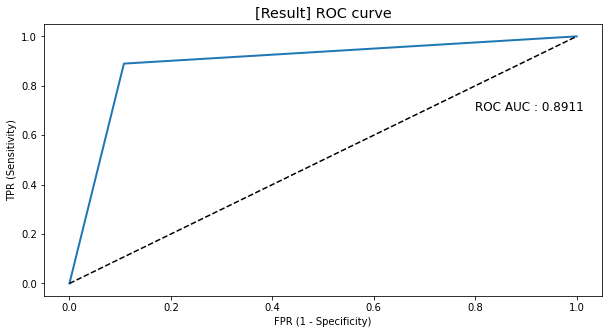

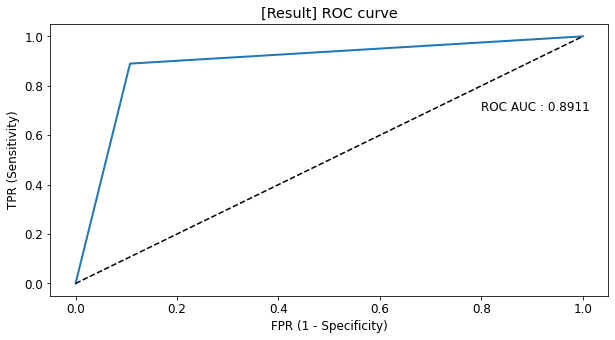

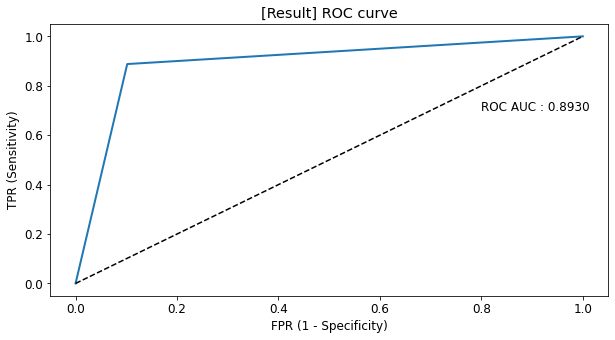

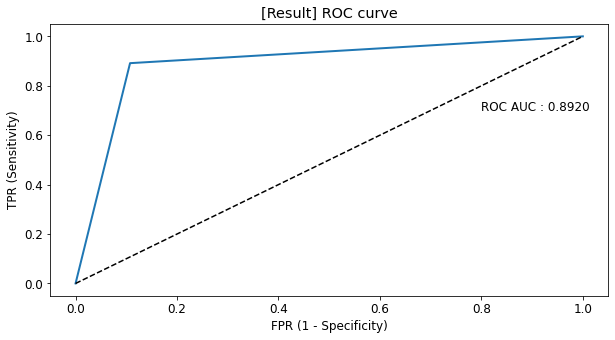

In [39]:
plt0 = plot_roc_curve(y_test, y_pred)
plt1 = plot_roc_curve(y_test, y_pred_sc)
plt2 = plot_roc_curve(y_test, y_pred_mm)
plt3 = plot_roc_curve(y_test, y_pred_rb)

In [41]:
from sklearn import metrics
print("[Normal] Accuracy score %.4f" %metrics.accuracy_score(y_test, y_pred))
print("[Standard Scaler] Accuracy score %.4f" %metrics.accuracy_score(y_test, y_pred_sc))
print("[MinMax scaler] Accuracy score %.4f" %metrics.accuracy_score(y_test, y_pred_mm))
print("[Robust scaler] Accuracy score %.4f" %metrics.accuracy_score(y_test, y_pred_rb))

[Normal] Accuracy score 0.8911
[Standard Scaler] Accuracy score 0.8911
[MinMax scaler] Accuracy score 0.8930
[Robust scaler] Accuracy score 0.8920


- scaling을 진행하지 않은 경우에는 0.8911, standardscaler를 이용한 경우 0.8911, MinMaxScaler를 이용한 경우 0.8930, Robust scaler를 이용한 경우 0.8920으로 약강의 성능 향상이 있긴 했으나 생각보다 크게 차이가 많이 나지 않는 모습을 보였습니다. 데이터 자체의 분포에서 taget이 많이 balancing 되어있었기 때문에 이러한 결과가 나타난 것으로 생각됩니다.